<a href="https://colab.research.google.com/github/MuhammadSufyan111/AI-lab-Project/blob/main/Ai_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
path = "/content/drive/MyDrive/smartphones.csv"
df = pd.read_csv(path)
df

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


In [10]:
# `shape` attribute of a dataframe object return a two value tuple containing rows and columns
# Note the rows count does not include the column labels and column count does not include the row index
df.shape

(1816, 8)

In [8]:
# `columns` attribute of a dataframe object return the list of column labels and its datatype
df.columns


Index(['Smartphone', 'Brand', 'Model', 'RAM', 'Storage', 'Color', 'Free',
       'Final Price'],
      dtype='object')

In [3]:
df.sample(5)

NameError: name 'df' is not defined

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM,1333.0,5.960990,2.668070,1.00,4.00,6.00,8.0000,12.00
Storage,1791.0,162.652150,139.411605,2.00,64.00,128.00,256.0000,1000.00
Final Price,1816.0,492.175573,398.606183,60.46,200.99,349.99,652.7175,2271.28


In [15]:
df.isnull().sum()

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [7]:
# Filling ram and storage with mode of there respective columns
df.fillna({'RAM': df['RAM'].mode()[0]} , inplace = True)
df.fillna({'Storage': df['Storage'].mode()[0]} , inplace = True)
df.isnull().sum()

Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Color          0
Free           0
Final Price    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
#df['Brand'].value_counts().plot(kind='pie',autopct="%.2f")
df['Brand'].value_counts()

Brand
Samsung       458
Xiaomi        351
Apple         292
Realme        117
OPPO           92
POCO           67
Motorola       57
Huawei         57
TCL            36
Cubot          34
Ulefone        30
Blackview      27
Vivo           27
Honor          27
OnePlus        22
Hammer         21
ZTE            17
Nokia          13
SPC            11
Google          9
Nothing         9
Alcatel         7
Crosscall       7
CAT             6
Gigaset         3
Qubo            3
Asus            3
Doro            3
Sony            2
Swissvoice      1
Maxcom          1
LG              1
BQ              1
Funker          1
Fairphone       1
Microsoft       1
Lenovo          1
Name: count, dtype: int64

(array([745., 441., 237., 152.,  95.,  62.,  41.,  24.,  14.,   5.]),
 array([  60.46 ,  281.542,  502.624,  723.706,  944.788, 1165.87 ,
        1386.952, 1608.034, 1829.116, 2050.198, 2271.28 ]),
 <BarContainer object of 10 artists>)

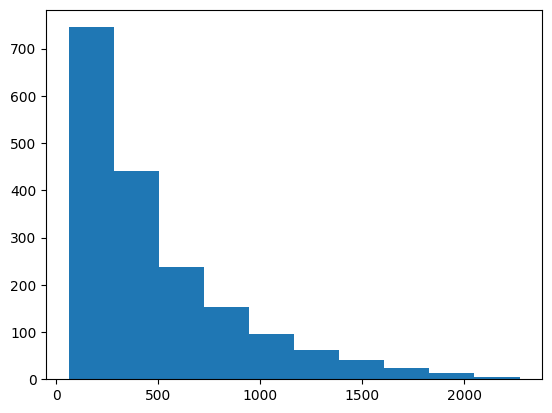

In [10]:
plt.hist(df['Final Price'])

In [ ]:
plt.figure(figsize=(27,5))
figure=sns.barplot(x=df.Brand.value_counts().index ,y= df.Brand.value_counts().values)

<Axes: xlabel='Brand'>

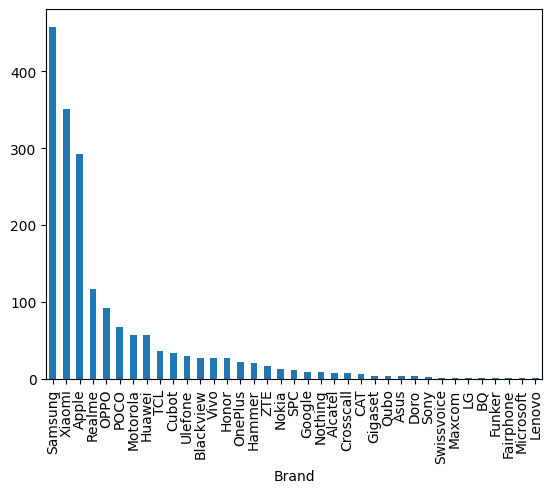

In [11]:
df['Brand'].value_counts().plot(kind='bar')

<ipython-input-12-0cd5d4899e06>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Final Price'])


<Axes: xlabel='Final Price', ylabel='Density'>

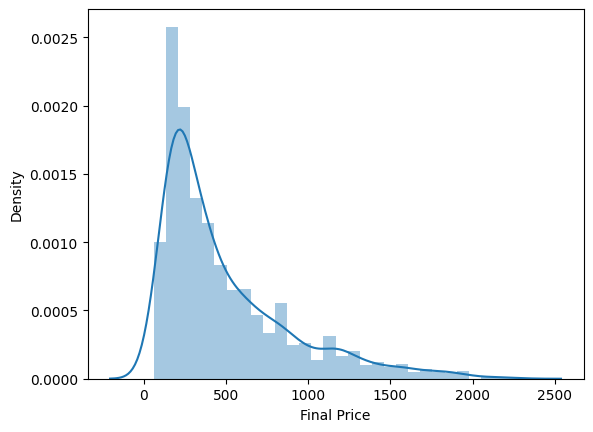

In [12]:
sns.distplot(df['Final Price'])

In [13]:
df['RAM'].corr(df['Final Price'])

0.5791258319806394

<Axes: ylabel='Final Price'>

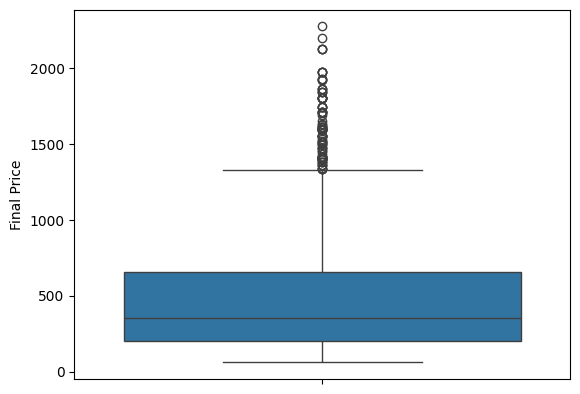

In [14]:
sns.boxplot(df['Final Price'])

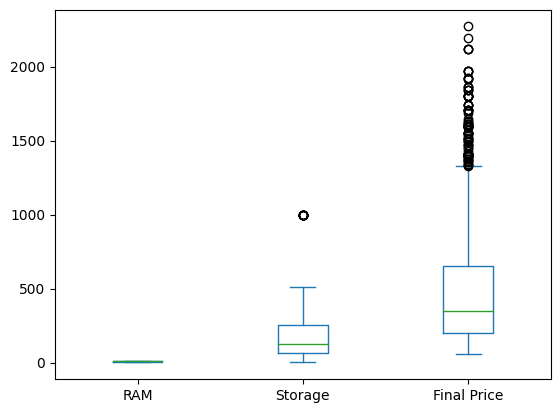

In [15]:
df.plot(kind = 'box')
plt.show()

<Axes: xlabel='RAM', ylabel='Count'>

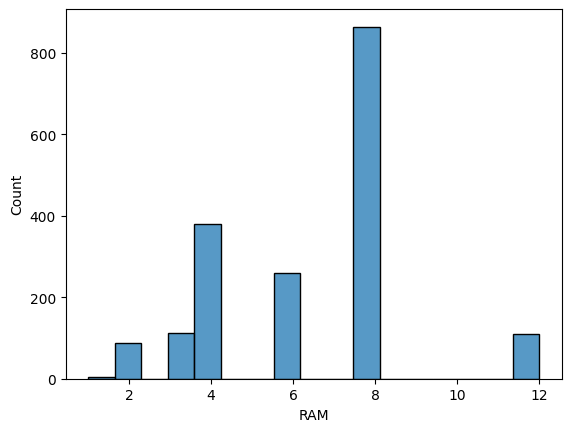

In [16]:
sns.histplot(df.RAM)